### Compare similarity between two images 

Contains function for presentation purposes


**Input**: origional image stack and a distorted image stack

These two images must have the same dimensions (in our case, allen tempalte and data registered to the allen template )

**Output**: plot structural similarity index measure (SSIM)

_Notes_: in our case the SSIM cares too much about luminosity and contrast...we actually just want the structure measures so we perform a histogram matching to the template first

In [1]:
import os

import tkinter as tk
import tkinter.filedialog as fdialog
from tkinter import simpledialog
# this is the gui for finding directory and files

# here we use skimage version 0.15
import skimage
from skimage import io

from skimage.transform import match_histograms as hmatch
# This this function is moved to skimage.exposure in newer skimage versions

from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse
#skimage.metrics.structural_similarity in newer skimage versions

import numpy as np

import matplotlib.pyplot as plt


In [9]:
Origional_file=fdialog.askopenfile(initialdir='D:\\', title='select origional image to be comapred to').name
Image_file=fdialog.askopenfile(initialdir='D:\\', title='select the image that needs to be compared with the origional').name


In [10]:
Origional = io.imread(Origional_file)
img1= io.imread(Image_file)

In [41]:
#for demonstration purposes

def compare_images(A,B):
    mssim,full_ssim= ssim(A, B, full= True,gaussian_weights=False, sigma=1.5, use_sample_covariance=False)
    img_mse= mse(A,B)
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))
    fig.suptitle(f'Comparing images \n mse= {img_mse:.6}, \n ssim={mssim:.6}')
    ax1.axis('off')
    ax2.axis('off')

    ax1.imshow(A, cmap = plt.cm.gray)
    ax1.set_title('Origional')
    ax2.imshow(B, cmap = plt.cm.gray)
    ax2.set_title('Distorted image')

    # show the images
    plt.show()
    
    full_ssim_map, ax3 = plt.subplots()
    im=ax3.imshow(full_ssim, cmap= plt.cm.gray)
    ax3.set_title('Full ssim map of distorted image, darker=worse')
    full_ssim_map.colorbar(im,ax=ax3)
    ax3.axis('off')

In [42]:
# for demonstration purposess
i=137
A=Origional[i,:,:]
B=img1[i,:,:]
B_new=hmatch (B,A)
# histogram_matching(Image, reference), here we want to match the img1 to the origional

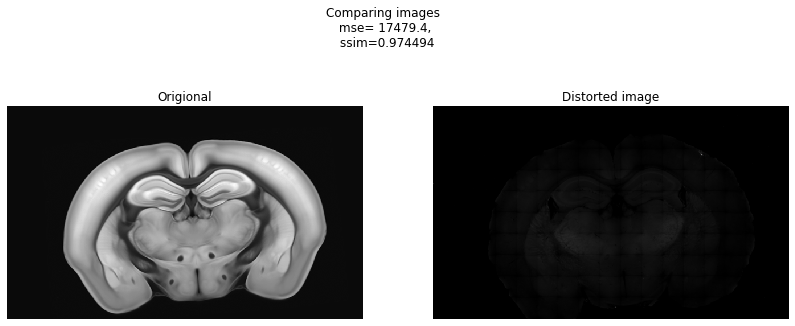

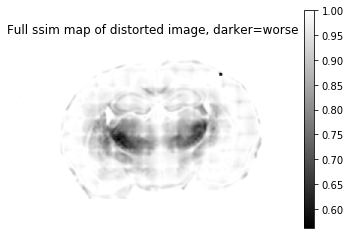

In [43]:
#for demonstration purposes
compare_images(A,B)

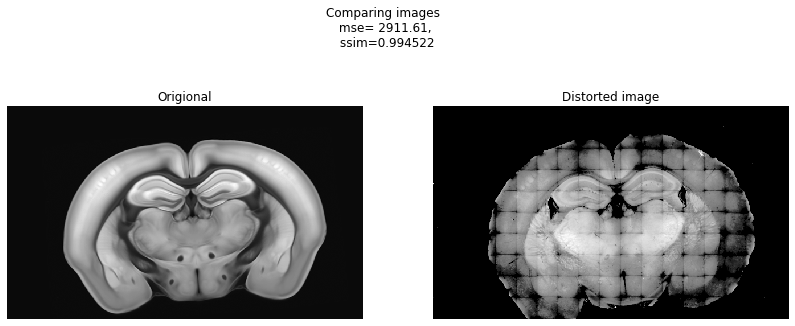

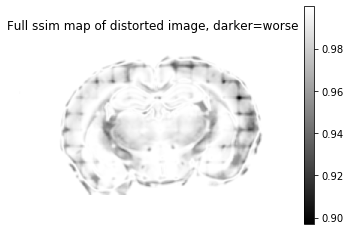

In [44]:
#for demonstration purposes
compare_images(A,B_new)

In [18]:
# Loop over entire image to get ssim
z_planes= Origional.shape[0]
all_ssim=np.zeros(z_planes)
for z in range(z_planes):
    temp_ssim=ssim(Origional[z,:,:], img1[z,:,:])
    all_ssim[z]=temp_ssim

In [20]:
all_ssim_matched=np.zeros(z_planes)
for z in range(z_planes):
    temp_ori=Origional[z,:,:]
    temp_distort=img1[z,:,:]
    matched_distort= hmatch(temp_distort,temp_ori)
    temp_ssim=ssim(temp_ori,matched_distort)
    all_ssim_matched[z]=temp_ssim

In [19]:
np.argmin(all_ssim)

2

Text(0.5, 1.0, 'after hist-histmatching')

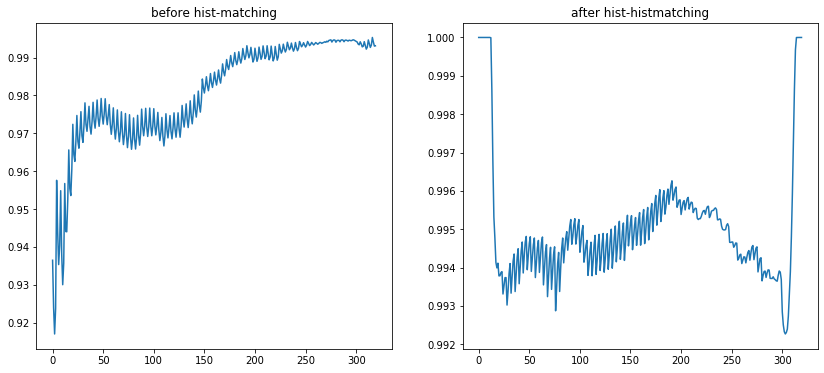

In [21]:
figure,(unmatched,matched) = plt.subplots(1,2,figsize=(14, 6))

unmatched.plot(all_ssim)
unmatched.set_title('before hist-matching')
matched.plot(all_ssim_matched)
matched.set_title('after hist-histmatching')
